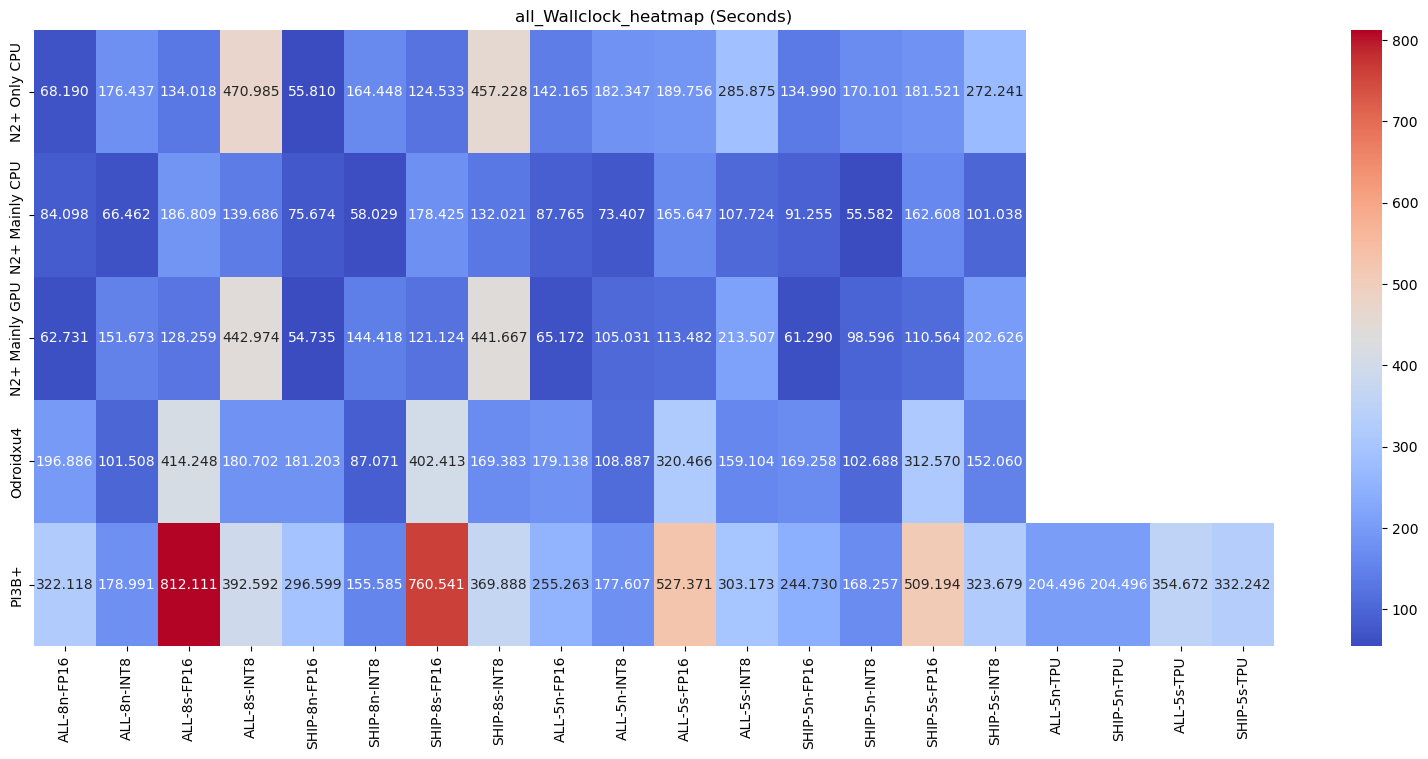

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def read_new_files_in_folder(folder_path):
    all_data = []
    filenames = []
    for file in os.listdir(folder_path):
        if file.endswith('.txt'):
            filepath = os.path.join(folder_path, file)
            with open(filepath, 'r') as f:
                lines = f.readlines()
                data = []
                for line in lines:
                    values = line.strip().split(' ')
                    if len(values) == 3:
                        try:
                            data.append([values[0], float(values[1]), float(values[2])])
                        except ValueError:
                            continue
                all_data.append(pd.DataFrame(data, columns=['Type', 'CPUTime', 'WallClockTime']))
                filenames.append(file)
    return all_data, filenames

def get_avg_highest_new_data(dataframes, data_type='total', time_type='CPUTime', top_n=10):
    folder_values = []
    for df in dataframes:
        filtered_df = df[df['Type'] == data_type]
        highest_values = filtered_df[time_type].nlargest(top_n).tolist()
        folder_values.append(np.mean(highest_values))
    return folder_values

def get_avg_new_data(dataframes, data_type='total', time_type='CPUTime'):
    folder_values = []
    for df in dataframes:
        filtered_df = df[df['Type'] == data_type]
        avg_value = filtered_df[time_type].mean()
        folder_values.append(avg_value)
    return folder_values

def get_median_new_data(dataframes, data_type='total', time_type='CPUTime'):
    folder_values = []
    for df in dataframes:
        filtered_df = df[df['Type'] == data_type]
        median_value = filtered_df[time_type].median()
        folder_values.append(median_value)
    return folder_values


folders = ['GPU/TIMEALL','OLD/time/n2+cputime/alltime', 'OLD/time/n2+gputime/alltime', 'OLD/time/odroidxu4time/alltime', 'OLD/time/pi3b+time/alltime']
#folders = ['GPU/TIME','OLD/time/n2+cputime/logtime', 'OLD/time/n2+gputime/logtime', 'OLD/time/odroidxu4time/logfiletime', 'OLD/time/pi3b+time/logfiletime']
all_avg_highest_memory = []
filenames_list = []

max_files =36

for folder in folders:
    data, filenames = read_new_files_in_folder(folder)
    avg = get_avg_new_data(data, time_type='WallClockTime',data_type='total')  # Changed the function and time_type parameter
    max_files = max(max_files, len(avg))
    all_avg_highest_memory.append(avg)
    filenames_list.append(filenames)


# Find the length of the longest row in the filenames_list
max_files = max([len(row) for row in filenames_list])

for i in range(len(all_avg_highest_memory)):
    if len(all_avg_highest_memory[i]) < max_files:
        all_avg_highest_memory[i].extend([np.nan] * (max_files - len(all_avg_highest_memory[i])))


heatmap_data = np.array(all_avg_highest_memory)

unique_filenames = []
for filenames in filenames_list:
    for filename in filenames:
        if filename not in unique_filenames:
            unique_filenames.append(filename)

heatmap_df = pd.DataFrame(heatmap_data, columns=unique_filenames)
index1 = 10
index2 = 12
index3 = 11
index4 = 13

heatmap_df[[unique_filenames[index1], unique_filenames[index2]]] = heatmap_df[[unique_filenames[index2], unique_filenames[index1]]]
heatmap_df[[unique_filenames[index3], unique_filenames[index4]]] = heatmap_df[[unique_filenames[index4], unique_filenames[index3]]]

# Swap the corresponding x-labels in the unique_filenames list
unique_filenames[index1], unique_filenames[index2] = unique_filenames[index2], unique_filenames[index1]
unique_filenames[index3], unique_filenames[index4] = unique_filenames[index4], unique_filenames[index3]

custom_y_labels = ['N2+ Only CPU', 'N2+ Mainly CPU ','N2+ Mainly GPU', 'Odroidxu4', 'PI3B+']

plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(heatmap_df, annot=True, cmap='coolwarm', fmt='.3f', yticklabels=custom_y_labels)


plt.title('all_Wallclock_heatmap (Seconds)')

box_width = 1

custom_x_labels = unique_filenames  # Use filenames as x labels

custom_x_labels = ['ALL-8n-FP16', 'ALL-8n-INT8', 'ALL-8s-FP16', 'ALL-8s-INT8', 'SHIP-8n-FP16', 'SHIP-8n-INT8', 'SHIP-8s-FP16', 'SHIP-8s-INT8','ALL-5n-FP16', 'ALL-5n-INT8', 'ALL-5s-FP16', 'ALL-5s-INT8', 'SHIP-5n-FP16', 'SHIP-5n-INT8', 'SHIP-5s-FP16', 'SHIP-5s-INT8','ALL-5n-TPU','SHIP-5n-TPU','ALL-5s-TPU','SHIP-5s-TPU']

heatmap.set_xticks(np.arange(heatmap_data.shape[1]) + box_width / 2)
heatmap.set_xticklabels(custom_x_labels, rotation=90)
plt.savefig('all_Wallclock_heatmap.jpeg', format='jpeg', dpi=1000)
plt.show()

folder_names = ['N2+ Only CPU', 'N2+ Mainly CPU ','N2+ Mainly GPU', 'Odroidxu4', 'PI3B+']
heatmap_df.index = folder_names

extension = "_walltime"

# Add the extension word to each string in the list
custom_x_labels = [string + extension for string in custom_x_labels]


heatmap_df.columns = custom_x_labels
heatmap_df.to_csv('avg_WALLCLOCK_heatmap_data2.csv')


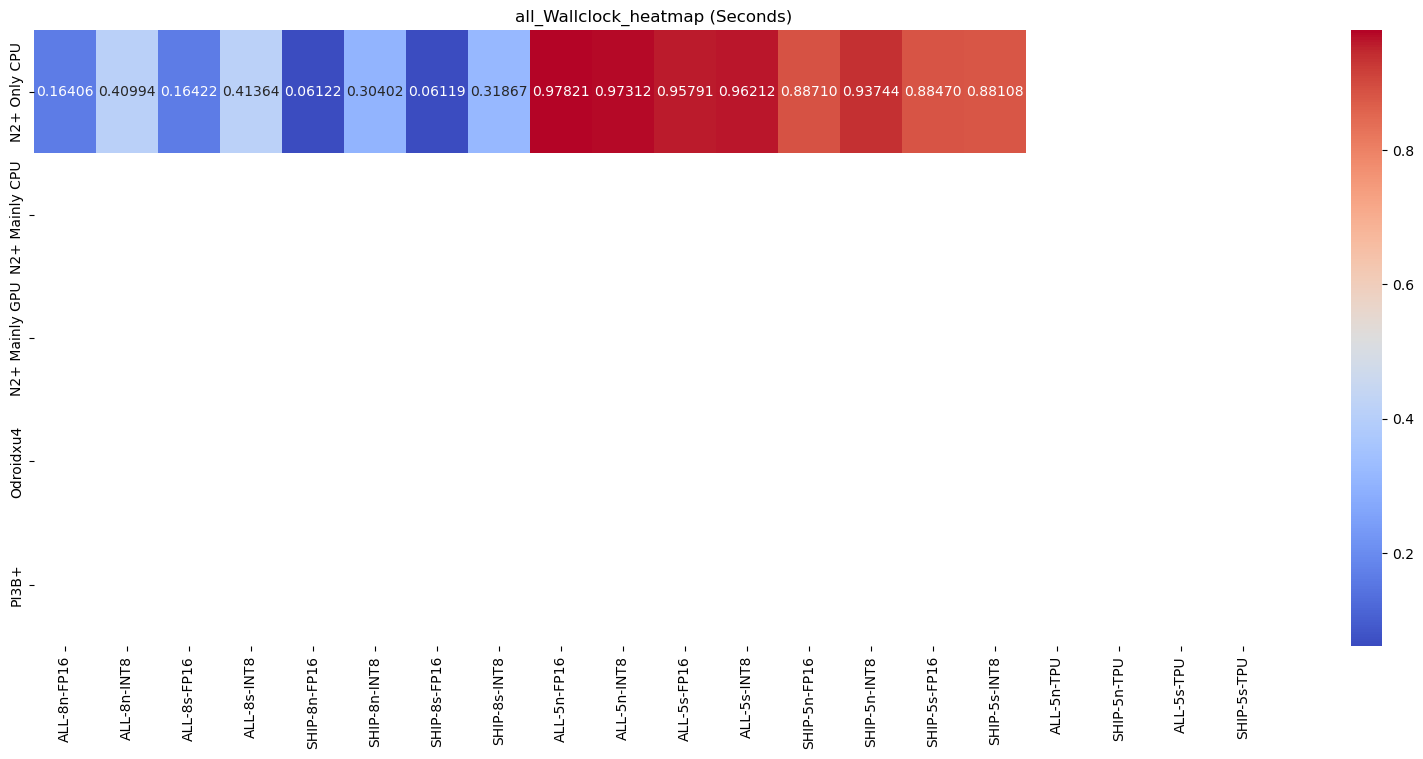

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def read_new_files_in_folder(folder_path):
    all_data = []
    filenames = []
    for file in os.listdir(folder_path):
        if file.endswith('.txt'):
            filepath = os.path.join(folder_path, file)
            with open(filepath, 'r') as f:
                lines = f.readlines()
                data = []
                for line in lines:
                    values = line.strip().split(' ')
                    if len(values) == 3:
                        try:
                            data.append([values[0], float(values[1]), float(values[2])])
                        except ValueError:
                            continue
                all_data.append(pd.DataFrame(data, columns=['Type', 'CPUTime', 'WallClockTime']))
                filenames.append(file)
    return all_data, filenames

def get_avg_highest_new_data(dataframes, data_type='total', time_type='CPUTime', top_n=10):
    folder_values = []
    for df in dataframes:
        filtered_df = df[df['Type'] == data_type]
        highest_values = filtered_df[time_type].nlargest(top_n).tolist()
        folder_values.append(np.mean(highest_values))
    return folder_values

def get_avg_new_data(dataframes, data_type='total', time_type='CPUTime'):
    folder_values = []
    for df in dataframes:
        filtered_df = df[df['Type'] == data_type]
        avg_value = filtered_df[time_type].mean()
        folder_values.append(avg_value)
    return folder_values

def get_median_new_data(dataframes, data_type='total', time_type='CPUTime'):
    folder_values = []
    for df in dataframes:
        filtered_df = df[df['Type'] == data_type]
        median_value = filtered_df[time_type].median()
        folder_values.append(median_value)
    return folder_values


folders = ['GPU/TIMEALL','OLD/time/n2+cputime/alltime', 'OLD/time/n2+gputime/alltime', 'OLD/time/odroidxu4time/alltime', 'OLD/time/pi3b+time/alltime']
folders = ['GPU/TIME','OLD/time/n2+cputime/logtime', 'OLD/time/n2+gputime/logtime', 'OLD/time/odroidxu4time/logfiletime', 'OLD/time/pi3b+time/logfiletime']
all_avg_highest_memory = []
filenames_list = []

max_files =36
#post-processing-NMSBOXES 

for folder in folders:
    data, filenames = read_new_files_in_folder(folder)
    avg = get_avg_new_data(data, time_type='WallClockTime',data_type='post-processing-NMSBOXES')  # Changed the function and time_type parameter
    max_files = max(max_files, len(avg))
    all_avg_highest_memory.append(avg)
    filenames_list.append(filenames)


# Find the length of the longest row in the filenames_list
max_files = max([len(row) for row in filenames_list])

for i in range(len(all_avg_highest_memory)):
    if len(all_avg_highest_memory[i]) < max_files:
        all_avg_highest_memory[i].extend([np.nan] * (max_files - len(all_avg_highest_memory[i])))


heatmap_data = np.array(all_avg_highest_memory)

unique_filenames = []
for filenames in filenames_list:
    for filename in filenames:
        if filename not in unique_filenames:
            unique_filenames.append(filename)

heatmap_df = pd.DataFrame(heatmap_data, columns=unique_filenames)
index1 = 10
index2 = 12
index3 = 11
index4 = 13

heatmap_df[[unique_filenames[index1], unique_filenames[index2]]] = heatmap_df[[unique_filenames[index2], unique_filenames[index1]]]
heatmap_df[[unique_filenames[index3], unique_filenames[index4]]] = heatmap_df[[unique_filenames[index4], unique_filenames[index3]]]

# Swap the corresponding x-labels in the unique_filenames list
unique_filenames[index1], unique_filenames[index2] = unique_filenames[index2], unique_filenames[index1]
unique_filenames[index3], unique_filenames[index4] = unique_filenames[index4], unique_filenames[index3]

custom_y_labels = ['N2+ Only CPU', 'N2+ Mainly CPU ','N2+ Mainly GPU', 'Odroidxu4', 'PI3B+']

plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(heatmap_df, annot=True, cmap='coolwarm', fmt='.5f', yticklabels=custom_y_labels)


plt.title('all_Wallclock_heatmap (Seconds)')

box_width = 1

custom_x_labels = unique_filenames  # Use filenames as x labels

custom_x_labels = ['ALL-8n-FP16', 'ALL-8n-INT8', 'ALL-8s-FP16', 'ALL-8s-INT8', 'SHIP-8n-FP16', 'SHIP-8n-INT8', 'SHIP-8s-FP16', 'SHIP-8s-INT8','ALL-5n-FP16', 'ALL-5n-INT8', 'ALL-5s-FP16', 'ALL-5s-INT8', 'SHIP-5n-FP16', 'SHIP-5n-INT8', 'SHIP-5s-FP16', 'SHIP-5s-INT8','ALL-5n-TPU','SHIP-5n-TPU','ALL-5s-TPU','SHIP-5s-TPU']

heatmap.set_xticks(np.arange(heatmap_data.shape[1]) + box_width / 2)
heatmap.set_xticklabels(custom_x_labels, rotation=90)
plt.savefig('all_Wallclock_heatmap.jpeg', format='jpeg', dpi=1000)
plt.show()

folder_names = ['N2+ Only CPU', 'N2+ Mainly CPU ','N2+ Mainly GPU', 'Odroidxu4', 'PI3B+']
heatmap_df.index = folder_names

extension = "_walltime"

# Add the extension word to each string in the list
custom_x_labels = [string + extension for string in custom_x_labels]


heatmap_df.columns = custom_x_labels
heatmap_df.to_csv('avg_WALLCLOCK_heatmap_data.csv')


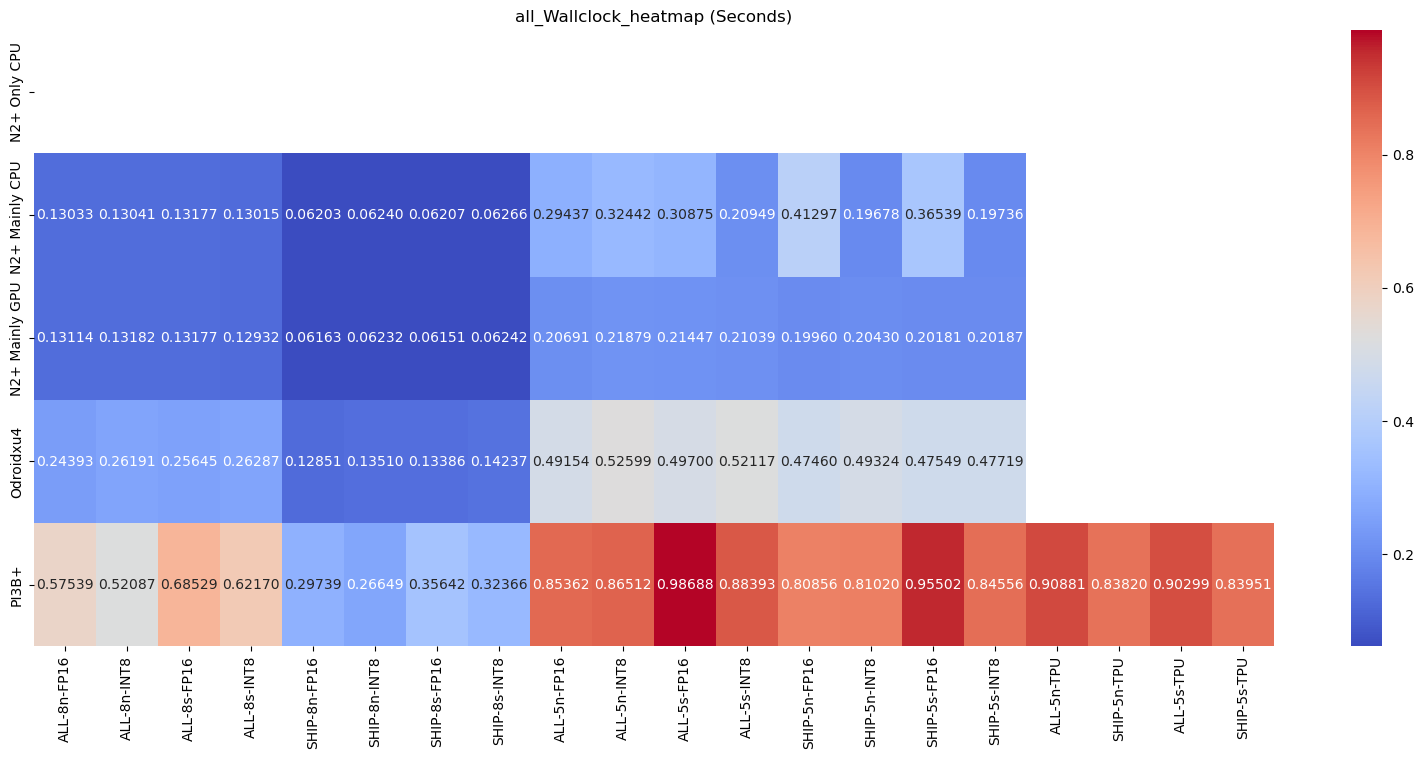

In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def read_new_files_in_folder(folder_path):
    all_data = []
    filenames = []
    for file in os.listdir(folder_path):
        if file.endswith('.txt'):
            filepath = os.path.join(folder_path, file)
            with open(filepath, 'r') as f:
                lines = f.readlines()
                data = []
                for line in lines:
                    values = line.strip().split(' ')
                    if len(values) == 3:
                        try:
                            data.append([values[0], float(values[1]), float(values[2])])
                        except ValueError:
                            continue
                all_data.append(pd.DataFrame(data, columns=['Type', 'CPUTime', 'WallClockTime']))
                filenames.append(file)
    return all_data, filenames

def get_avg_highest_new_data(dataframes, data_type='total', time_type='CPUTime', top_n=10):
    folder_values = []
    for df in dataframes:
        filtered_df = df[df['Type'] == data_type]
        highest_values = filtered_df[time_type].nlargest(top_n).tolist()
        folder_values.append(np.mean(highest_values))
    return folder_values

def get_avg_new_data(dataframes, data_type='total', time_type='CPUTime'):
    folder_values = []
    for df in dataframes:
        filtered_df = df[df['Type'] == data_type]
        avg_value = filtered_df[time_type].mean()
        folder_values.append(avg_value)
    return folder_values

def get_median_new_data(dataframes, data_type='total', time_type='CPUTime'):
    folder_values = []
    for df in dataframes:
        filtered_df = df[df['Type'] == data_type]
        median_value = filtered_df[time_type].median()
        folder_values.append(median_value)
    return folder_values


folders = ['GPU/TIMEALL','OLD/time/n2+cputime/alltime', 'OLD/time/n2+gputime/alltime', 'OLD/time/odroidxu4time/alltime', 'OLD/time/pi3b+time/alltime']
folders = ['GPU/TIME','OLD/time/n2+cputime/logtime', 'OLD/time/n2+gputime/logtime', 'OLD/time/odroidxu4time/logfiletime', 'OLD/time/pi3b+time/logfiletime']
all_avg_highest_memory = []
filenames_list = []

max_files =36
#post-processing-NMSBOXES 

for folder in folders:
    data, filenames = read_new_files_in_folder(folder)
    avg = get_avg_new_data(data, time_type='WallClockTime',data_type='post-processing')  # Changed the function and time_type parameter
    max_files = max(max_files, len(avg))
    all_avg_highest_memory.append(avg)
    filenames_list.append(filenames)


# Find the length of the longest row in the filenames_list
max_files = max([len(row) for row in filenames_list])

for i in range(len(all_avg_highest_memory)):
    if len(all_avg_highest_memory[i]) < max_files:
        all_avg_highest_memory[i].extend([np.nan] * (max_files - len(all_avg_highest_memory[i])))


heatmap_data = np.array(all_avg_highest_memory)

unique_filenames = []
for filenames in filenames_list:
    for filename in filenames:
        if filename not in unique_filenames:
            unique_filenames.append(filename)

heatmap_df = pd.DataFrame(heatmap_data, columns=unique_filenames)
index1 = 10
index2 = 12
index3 = 11
index4 = 13

heatmap_df[[unique_filenames[index1], unique_filenames[index2]]] = heatmap_df[[unique_filenames[index2], unique_filenames[index1]]]
heatmap_df[[unique_filenames[index3], unique_filenames[index4]]] = heatmap_df[[unique_filenames[index4], unique_filenames[index3]]]

# Swap the corresponding x-labels in the unique_filenames list
unique_filenames[index1], unique_filenames[index2] = unique_filenames[index2], unique_filenames[index1]
unique_filenames[index3], unique_filenames[index4] = unique_filenames[index4], unique_filenames[index3]

custom_y_labels = ['N2+ Only CPU', 'N2+ Mainly CPU ','N2+ Mainly GPU', 'Odroidxu4', 'PI3B+']

plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(heatmap_df, annot=True, cmap='coolwarm', fmt='.5f', yticklabels=custom_y_labels)


plt.title('all_Wallclock_heatmap (Seconds)')

box_width = 1

custom_x_labels = unique_filenames  # Use filenames as x labels

custom_x_labels = ['ALL-8n-FP16', 'ALL-8n-INT8', 'ALL-8s-FP16', 'ALL-8s-INT8', 'SHIP-8n-FP16', 'SHIP-8n-INT8', 'SHIP-8s-FP16', 'SHIP-8s-INT8','ALL-5n-FP16', 'ALL-5n-INT8', 'ALL-5s-FP16', 'ALL-5s-INT8', 'SHIP-5n-FP16', 'SHIP-5n-INT8', 'SHIP-5s-FP16', 'SHIP-5s-INT8','ALL-5n-TPU','SHIP-5n-TPU','ALL-5s-TPU','SHIP-5s-TPU']

heatmap.set_xticks(np.arange(heatmap_data.shape[1]) + box_width / 2)
heatmap.set_xticklabels(custom_x_labels, rotation=90)
plt.savefig('all_Wallclock_heatmap.jpeg', format='jpeg', dpi=1000)
plt.show()

folder_names = ['N2+ Only CPU', 'N2+ Mainly CPU ','N2+ Mainly GPU', 'Odroidxu4', 'PI3B+']
heatmap_df.index = folder_names

extension = "_walltime"

# Add the extension word to each string in the list
custom_x_labels = [string + extension for string in custom_x_labels]


heatmap_df.columns = custom_x_labels
heatmap_df.to_csv('avg_WALLCLOCK_heatmap_data.csv')


In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def read_new_files_in_folder(folder_path):
    all_data = []
    filenames = []
    for file in os.listdir(folder_path):
        if file.endswith('.txt'):
            filepath = os.path.join(folder_path, file)
            with open(filepath, 'r') as f:
                lines = f.readlines()
                data = []
                for line in lines:
                    values = line.strip().split(' ')
                    if len(values) == 3:
                        try:
                            data.append([values[0], float(values[1]), float(values[2])])
                        except ValueError:
                            continue
                all_data.append(pd.DataFrame(data, columns=['Type', 'CPUTime', 'WallClockTime']))
                filenames.append(file)
    return all_data, filenames

def get_avg_highest_new_data(dataframes, data_type='total', time_type='CPUTime', top_n=10):
    folder_values = []
    for df in dataframes:
        filtered_df = df[df['Type'] == data_type]
        highest_values = filtered_df[time_type].nlargest(top_n).tolist()
        folder_values.append(np.mean(highest_values))
    return folder_values

def get_avg_new_data(dataframes, data_type='total', time_type='CPUTime'):
    folder_values = []
    for df in dataframes:
        filtered_df = df[df['Type'] == data_type]
        avg_value = filtered_df[time_type].mean()
        folder_values.append(avg_value)
    return folder_values

def get_median_new_data(dataframes, data_type='total', time_type='CPUTime'):
    folder_values = []
    for df in dataframes:
        filtered_df = df[df['Type'] == data_type]
        median_value = filtered_df[time_type].median()
        folder_values.append(median_value)
    return folder_values


folders = ['GPU/TIMEALL','OLD/time/n2+cputime/alltime', 'OLD/time/n2+gputime/alltime', 'OLD/time/odroidxu4time/alltime', 'OLD/time/pi3b+time/alltime']
folders = ['GPU/TIME','OLD/time/n2+cputime/logtime', 'OLD/time/n2+gputime/logtime', 'OLD/time/odroidxu4time/logfiletime', 'OLD/time/pi3b+time/logfiletime']
folders = ['OLD/time/n2+cputime/logtime', 'OLD/time/n2+gputime/logtime', 'OLD/time/odroidxu4time/logfiletime', 'OLD/time/pi3b+time/logfiletime']
all_avg_highest_memory = []
filenames_list = []

max_files =36

for folder in folders:
    data, filenames = read_new_files_in_folder(folder)
    avg = get_avg_new_data(data, time_type='WallClockTime',data_type='init')  # Changed the function and time_type parameter
    max_files = max(max_files, len(avg))
    all_avg_highest_memory.append(avg)
    filenames_list.append(filenames)


# Find the length of the longest row in the filenames_list
max_files = max([len(row) for row in filenames_list])

for i in range(len(all_avg_highest_memory)):
    if len(all_avg_highest_memory[i]) < max_files:
        all_avg_highest_memory[i].extend([np.nan] * (max_files - len(all_avg_highest_memory[i])))


heatmap_data = np.array(all_avg_highest_memory)

unique_filenames = []
for filenames in filenames_list:
    for filename in filenames:
        if filename not in unique_filenames:
            unique_filenames.append(filename)

heatmap_df = pd.DataFrame(heatmap_data, columns=unique_filenames)
index1 = 10
index2 = 12
index3 = 11
index4 = 13

heatmap_df[[unique_filenames[index1], unique_filenames[index2]]] = heatmap_df[[unique_filenames[index2], unique_filenames[index1]]]
heatmap_df[[unique_filenames[index3], unique_filenames[index4]]] = heatmap_df[[unique_filenames[index4], unique_filenames[index3]]]

# Swap the corresponding x-labels in the unique_filenames list
unique_filenames[index1], unique_filenames[index2] = unique_filenames[index2], unique_filenames[index1]
unique_filenames[index3], unique_filenames[index4] = unique_filenames[index4], unique_filenames[index3]

custom_y_labels = ['N2+ CPU','N2+ GPU', 'Odroidxu4', 'PI3B+']

plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(heatmap_df, annot=True, cmap='coolwarm', fmt='.5f', yticklabels=custom_y_labels)


plt.title('Init_Wallclock_heatmap (Seconds)')

box_width = 1

custom_x_labels = unique_filenames  # Use filenames as x labels

custom_x_labels = ['ALL-8n-FP16', 'ALL-8n-INT8', 'ALL-8s-FP16', 'ALL-8s-INT8', 'SHIP-8n-FP16', 'SHIP-8n-INT8', 'SHIP-8s-FP16', 'SHIP-8s-INT8','ALL-5n-FP16', 'ALL-5n-INT8', 'ALL-5s-FP16', 'ALL-5s-INT8', 'SHIP-5n-FP16', 'SHIP-5n-INT8', 'SHIP-5s-FP16', 'SHIP-5s-INT8','ALL-5n-TPU','SHIP-5n-TPU','ALL-5s-TPU','SHIP-5s-TPU']

heatmap.set_xticks(np.arange(heatmap_data.shape[1]) + box_width / 2)
heatmap.set_xticklabels(custom_x_labels, rotation=90)
plt.savefig('all_Wallclock_heatmap.jpeg', format='jpeg', dpi=1000)
plt.show()

folder_names = ['N2+ Only CPU', 'N2+ Mainly CPU ','N2+ Mainly GPU', 'Odroidxu4', 'PI3B+']
heatmap_df.index = folder_names

extension = "_walltime"

# Add the extension word to each string in the list
custom_x_labels = [string + extension for string in custom_x_labels]


heatmap_df.columns = custom_x_labels
heatmap_df.to_csv('avg_WALLCLOCK_heatmap_data.csv')


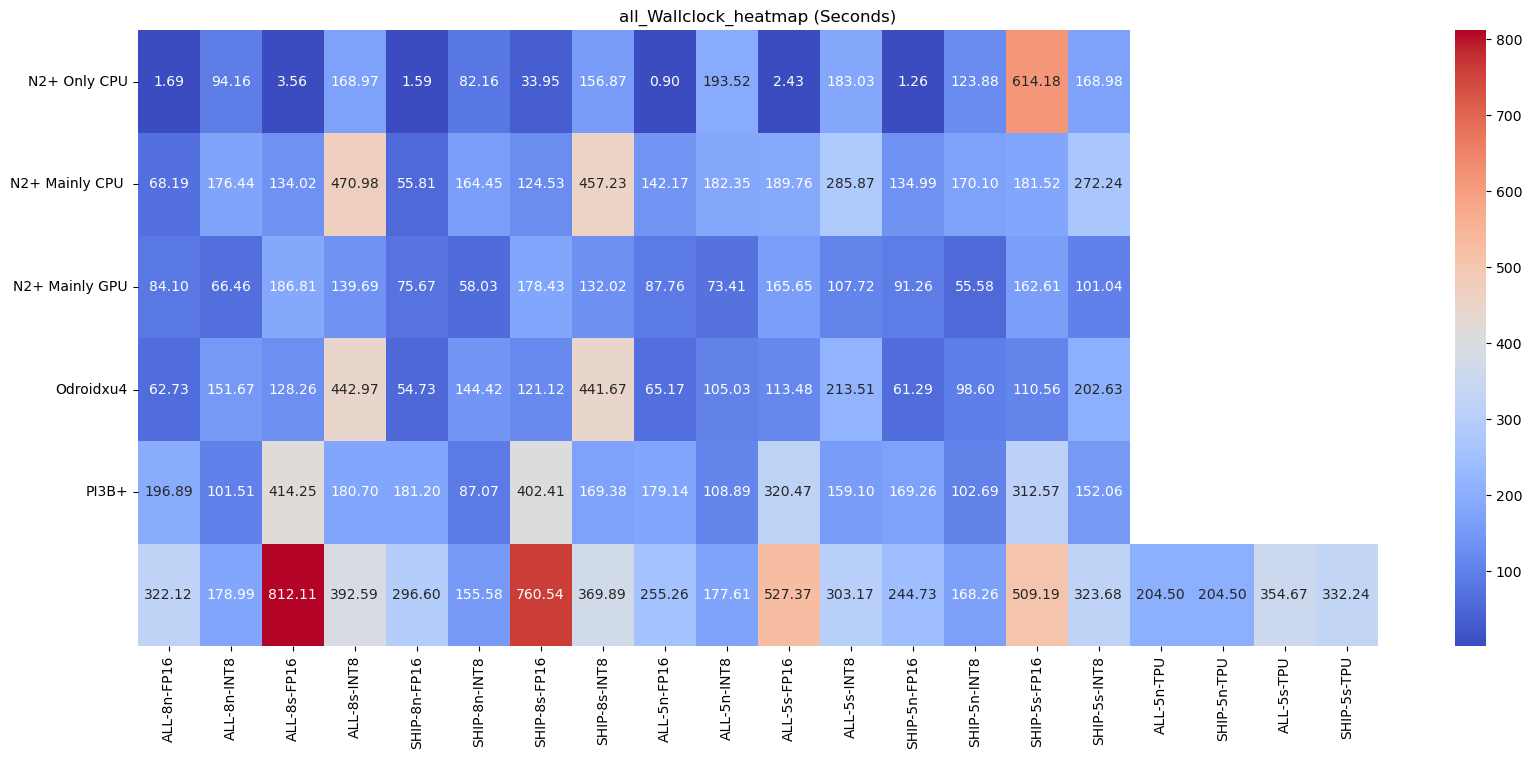

In [6]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def read_new_files_in_folder(folder_path):
    all_data = []
    filenames = []
    for file in os.listdir(folder_path):
        if file.endswith('.txt'):
            filepath = os.path.join(folder_path, file)
            with open(filepath, 'r') as f:
                lines = f.readlines()
                data = []
                for line in lines:
                    values = line.strip().split(' ')
                    if len(values) == 3:
                        try:
                            data.append([values[0], float(values[1]), float(values[2])])
                        except ValueError:
                            continue
                all_data.append(pd.DataFrame(data, columns=['Type', 'CPUTime', 'WallClockTime']))
                filenames.append(file)
    return all_data, filenames

def get_avg_highest_new_data(dataframes, data_type='total', time_type='CPUTime', top_n=10):
    folder_values = []
    for df in dataframes:
        filtered_df = df[df['Type'] == data_type]
        highest_values = filtered_df[time_type].nlargest(top_n).tolist()
        folder_values.append(np.mean(highest_values))
    return folder_values

def get_avg_new_data(dataframes, data_type='total', time_type='CPUTime'):
    folder_values = []
    for df in dataframes:
        filtered_df = df[df['Type'] == data_type]
        avg_value = filtered_df[time_type].mean()
        folder_values.append(avg_value)
    return folder_values

def get_median_new_data(dataframes, data_type='total', time_type='CPUTime'):
    folder_values = []
    for df in dataframes:
        filtered_df = df[df['Type'] == data_type]
        median_value = filtered_df[time_type].median()
        folder_values.append(median_value)
    return folder_values


folders = ['n2+CPU/totaltime','GPU/TIMEALL','OLD/time/n2+cputime/alltime', 'OLD/time/n2+gputime/alltime', 'OLD/time/odroidxu4time/alltime', 'OLD/time/pi3b+time/alltime']
#folders = ['GPU/TIME','OLD/time/n2+cputime/logtime', 'OLD/time/n2+gputime/logtime', 'OLD/time/odroidxu4time/logfiletime', 'OLD/time/pi3b+time/logfiletime']
all_avg_highest_memory = []
filenames_list = []

max_files =36

for folder in folders:
    data, filenames = read_new_files_in_folder(folder)
    avg = get_avg_new_data(data, time_type='WallClockTime',data_type='total')  # Changed the function and time_type parameter
    max_files = max(max_files, len(avg))
    all_avg_highest_memory.append(avg)
    filenames_list.append(filenames)


# Find the length of the longest row in the filenames_list
max_files = max([len(row) for row in filenames_list])

for i in range(len(all_avg_highest_memory)):
    if len(all_avg_highest_memory[i]) < max_files:
        all_avg_highest_memory[i].extend([np.nan] * (max_files - len(all_avg_highest_memory[i])))


heatmap_data = np.array(all_avg_highest_memory)

unique_filenames = []
for filenames in filenames_list:
    for filename in filenames:
        if filename not in unique_filenames:
            unique_filenames.append(filename)

heatmap_df = pd.DataFrame(heatmap_data, columns=unique_filenames)
index1 = 10
index2 = 12
index3 = 11
index4 = 13

heatmap_df[[unique_filenames[index1], unique_filenames[index2]]] = heatmap_df[[unique_filenames[index2], unique_filenames[index1]]]
heatmap_df[[unique_filenames[index3], unique_filenames[index4]]] = heatmap_df[[unique_filenames[index4], unique_filenames[index3]]]

# Swap the corresponding x-labels in the unique_filenames list
unique_filenames[index1], unique_filenames[index2] = unique_filenames[index2], unique_filenames[index1]
unique_filenames[index3], unique_filenames[index4] = unique_filenames[index4], unique_filenames[index3]

custom_y_labels = ['N2+ Only CPU', 'N2+ Mainly CPU ','N2+ Mainly GPU', 'Odroidxu4', 'PI3B+']

plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(heatmap_df, annot=True, cmap='coolwarm', fmt='.2f', yticklabels=custom_y_labels)


plt.title('all_Wallclock_heatmap (Seconds)')

box_width = 1

custom_x_labels = unique_filenames  # Use filenames as x labels

custom_x_labels = ['ALL-8n-FP16', 'ALL-8n-INT8', 'ALL-8s-FP16', 'ALL-8s-INT8', 'SHIP-8n-FP16', 'SHIP-8n-INT8', 'SHIP-8s-FP16', 'SHIP-8s-INT8','ALL-5n-FP16', 'ALL-5n-INT8', 'ALL-5s-FP16', 'ALL-5s-INT8', 'SHIP-5n-FP16', 'SHIP-5n-INT8', 'SHIP-5s-FP16', 'SHIP-5s-INT8','ALL-5n-TPU','SHIP-5n-TPU','ALL-5s-TPU','SHIP-5s-TPU']

heatmap.set_xticks(np.arange(heatmap_data.shape[1]) + box_width / 2)
heatmap.set_xticklabels(custom_x_labels, rotation=90)
plt.savefig('all_Wallclock_heatmap.jpeg', format='jpeg', dpi=1000)
plt.show()

folder_names = ['N2+  CPU NMS','N2+  GPU NMS', 'N2+ Mainly CPU ','N2+ Mainly GPU', 'Odroidxu4', 'PI3B+']
heatmap_df.index = folder_names

extension = "_walltime"

# Add the extension word to each string in the list
custom_x_labels = [string + extension for string in custom_x_labels]


heatmap_df.columns = custom_x_labels
heatmap_df.to_csv('avg_WALLCLOCK_heatmap_data2.csv')


In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def read_new_files_in_folder(folder_path):
    all_data = []
    filenames = []
    for file in os.listdir(folder_path):
        if file.endswith('.txt'):
            filepath = os.path.join(folder_path, file)
            with open(filepath, 'r') as f:
                lines = f.readlines()
                data = []
                for line in lines:
                    values = line.strip().split(' ')
                    if len(values) == 3:
                        try:
                            data.append([values[0], float(values[1]), float(values[2])])
                        except ValueError:
                            continue
                all_data.append(pd.DataFrame(data, columns=['Type', 'CPUTime', 'WallClockTime']))
                filenames.append(file)
    return all_data, filenames

def get_avg_highest_new_data(dataframes, data_type='inference', time_type='CPUTime', top_n=10):
    folder_values = []
    for df in dataframes:
        filtered_df = df[df['Type'] == data_type]
        highest_values = filtered_df[time_type].nlargest(top_n).tolist()
        folder_values.append(np.mean(highest_values))
    return folder_values

def get_avg_new_data(dataframes, data_type='inference', time_type='CPUTime'):
    folder_values = []
    for df in dataframes:
        filtered_df = df[df['Type'] == data_type]
        avg_value = filtered_df[time_type].mean()
        folder_values.append(avg_value)
    return folder_values

def get_median_new_data(dataframes, data_type='inference', time_type='CPUTime'):
    folder_values = []
    for df in dataframes:
        filtered_df = df[df['Type'] == data_type]
        median_value = filtered_df[time_type].median()
        folder_values.append(median_value)
    return folder_values


folders = ['time/n2+cputime/alltime', 'time/n2+gputime/alltime', 'time/odroidxu4time/alltime', 'time/pi3b+time/alltime']

all_avg_highest_memory = []
filenames_list = []

max_files = 0

for folder in folders:
    data, filenames = read_new_files_in_folder(folder)
    avg = get_avg_new_data(data, data_type = 'total',time_type='WallClockTime')  # Changed the function and time_type parameter
    max_files = max(max_files, len(avg))
    all_avg_highest_memory.append(avg)
    filenames_list.append(filenames)



unique_filenames = []
for filenames in filenames_list:
    for filename in filenames:
        if filename not in unique_filenames:
            unique_filenames.append(filename)

max_files = len(unique_filenames)

for i in range(len(all_avg_highest_memory)):
    if len(all_avg_highest_memory[i]) < max_files:
        all_avg_highest_memory[i].extend([np.nan] * (max_files - len(all_avg_highest_memory[i])))

heatmap_data = np.array(all_avg_highest_memory)

heatmap_df = pd.DataFrame(heatmap_data, columns=unique_filenames)


index1 = 10
index2 = 12
index3 = 11
index4 = 13

heatmap_df[[unique_filenames[index1], unique_filenames[index2]]] = heatmap_df[[unique_filenames[index2], unique_filenames[index1]]]
heatmap_df[[unique_filenames[index3], unique_filenames[index4]]] = heatmap_df[[unique_filenames[index4], unique_filenames[index3]]]

# Swap the corresponding x-labels in the unique_filenames list
unique_filenames[index1], unique_filenames[index2] = unique_filenames[index2], unique_filenames[index1]
unique_filenames[index3], unique_filenames[index4] = unique_filenames[index4], unique_filenames[index3]

custom_y_labels = ['N2+ CPU','N2+ GPU', 'Odroidxu4', 'PI3B+']

plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(heatmap_df, annot=True, cmap='coolwarm', fmt='.2f', yticklabels=custom_y_labels)


plt.title('Median CPU Time Inference (Seconds)')

box_width = 1

custom_x_labels = unique_filenames  # Use filenames as x labels

custom_x_labels = ['ALL-8n-FP16', 'ALL-8n-INT8', 'ALL-8s-FP16', 'ALL-8s-INT8', 'SHIP-8n-FP16', 'SHIP-8n-INT8', 'SHIP-8s-FP16', 'SHIP-8s-INT8','ALL-5n-FP16', 'ALL-5n-INT8', 'ALL-5s-FP16', 'ALL-5s-INT8', 'SHIP-5n-FP16', 'SHIP-5n-INT8', 'SHIP-5s-FP16', 'SHIP-5s-INT8','ALL-5n-TPU','SHIP-5n-TPU','ALL-5s-TPU','SHIP-5s-TPU']

heatmap.set_xticks(np.arange(heatmap_data.shape[1]) + box_width / 2)
heatmap.set_xticklabels(custom_x_labels, rotation=90)
plt.savefig('median_CPUTIME_heatmap.jpeg', format='jpeg', dpi=1000)
plt.show()

folder_names = ['N2+ CPU','N2+ GPU', 'Odroidxu4', 'PI3B+']
heatmap_df.index = folder_names

extension = "_walltime"

# Add the extension word to each string in the list
custom_x_labels = [string + extension for string in custom_x_labels]


heatmap_df.columns = custom_x_labels
heatmap_df.to_csv('TOTAL_WALLCLOCK_heatmap_data.csv')


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'time/n2+cputime/alltime'

C:\Users\jspre\AppData\Local\Temp\ipykernel_9088\3736854846.py:13: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(filepath, skiprows=1, delimiter=r'\s+', names=['Elapsed time', 'CPU (%)', 'Real (MB)', 'Virtual (MB)'], error_bad_lines=False)
b'Skipping line 3979: expected 4 fields, saw 9\nSkipping line 7959: expected 4 fields, saw 9\n'
C:\Users\jspre\AppData\Local\Temp\ipykernel_9088\3736854846.py:13: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(filepath, skiprows=1, delimiter=r'\s+', names=['Elapsed time', 'CPU (%)', 'Real (MB)', 'Virtual (MB)'], error_bad_lines=False)
b'Skipping line 10839: expected 4 fields, saw 9\nSkipping line 21388: expected 4 fields, saw 9\n'
C:\Users\jspre\AppData\Local\Temp\ipykernel_9088\3736854846.py:13: FutureWarning: The error_bad_lines 

ValueError: Length mismatch: Expected axis has 5 elements, new values have 4 elements

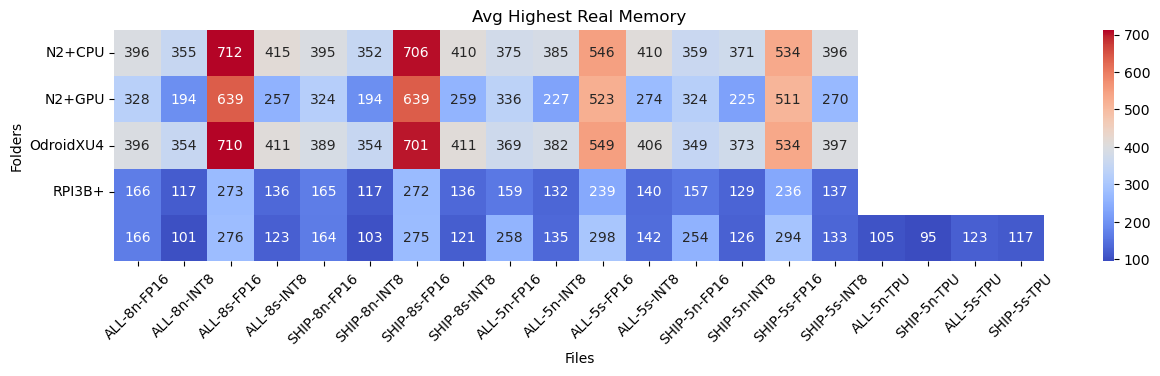

In [20]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def read_files_in_folder(folder_path):
    all_data = []
    filenames = []
    for file in os.listdir(folder_path):
        if file.endswith('.txt'):
            filepath = os.path.join(folder_path, file)
            df = pd.read_csv(filepath, skiprows=1, delimiter=r'\s+', names=['Elapsed time', 'CPU (%)', 'Real (MB)', 'Virtual (MB)'], error_bad_lines=False)
            all_data.append(df)
            filenames.append(file)
    return all_data, filenames

def get_median_real_memory(dataframes):
    folder_values = []
    for df in dataframes:
        median_value = df['Real (MB)'].median()
        folder_values.append(median_value)
    return folder_values

def get_avg_highest_real_memory(dataframes, top_n=10):
    folder_values = []
    for df in dataframes:
        highest_values = df['Real (MB)'].nlargest(top_n).tolist()
        folder_values.append(np.mean(highest_values))
    return folder_values

folders = ['GPU/memory/output_directory/','OLD/memory/n2+GPU/processrecordings/output_directory', 'OLD/memory/n2+GPU/n2+pyrecord/output_directory','OLD/memory/odroidxu4/processrecordings/output_directory','OLD/memory/pi3b+/processrecordings/output_directory']
folders = ['GPU/memory/output_directory/','OLD/memory/n2+CPU/processrecordings/output_directory', 'OLD/memory/n2+GPU/n2+pyrecord/output_directory','OLD/memory/odroidxu4/processrecordings/output_directory','OLD/memory/pi3b+/processrecordings/output_directory']
all_avg_highest_memory = []
filenames_list = []

max_files = 0
for folder in folders:
    data, filenames = read_files_in_folder(folder)
    avg = get_avg_highest_real_memory(data)
    max_files = max(max_files, len(avg))
    all_avg_highest_memory.append(avg)
    filenames_list.append(filenames)

# Fill the missing values with NaN
for i in range(len(all_avg_highest_memory)):
    if len(all_avg_highest_memory[i]) < max_files:
        all_avg_highest_memory[i].extend([np.nan] * (max_files - len(all_avg_highest_memory[i])))

heatmap_data = np.array(all_avg_highest_memory)

# Set xticklabels to filenames
unique_filenames = []
for filenames in filenames_list:
    for filename in filenames:
        if filename not in unique_filenames:
            unique_filenames.append(filename)

# Convert the heatmap_data array to a DataFrame
heatmap_df = pd.DataFrame(heatmap_data, columns=unique_filenames)



# Swap columns and their corresponding labels
index1 = 10
index2 = 12
index3 = 11
index4 = 13

# Swap columns in the heatmap_df DataFrame
heatmap_df[[unique_filenames[index1], unique_filenames[index2]]] = heatmap_df[[unique_filenames[index2], unique_filenames[index1]]]
heatmap_df[[unique_filenames[index3], unique_filenames[index4]]] = heatmap_df[[unique_filenames[index4], unique_filenames[index3]]]

# Swap the corresponding x-labels in the unique_filenames list
unique_filenames[index1], unique_filenames[index2] = unique_filenames[index2], unique_filenames[index1]
unique_filenames[index3], unique_filenames[index4] = unique_filenames[index4], unique_filenames[index3]

plt.figure(figsize=(15, 3))
custom_y_labels = ['N2+CPU','N2+GPU', 'OdroidXU4', 'RPI3B+']
heatmap = sns.heatmap(heatmap_df, annot=True, cmap='coolwarm', fmt='.0f', yticklabels=custom_y_labels)

plt.xlabel('Files')
plt.ylabel('Folders')
plt.title('Avg Highest Real Memory')

# Set the number of xticks and the labels
box_width = 1


custom_x_labels = ['ALL-8n-FP16', 'ALL-8n-INT8', 'ALL-8s-FP16', 'ALL-8s-INT8', 'SHIP-8n-FP16', 'SHIP-8n-INT8', 'SHIP-8s-FP16', 'SHIP-8s-INT8','ALL-5n-FP16', 'ALL-5n-INT8', 'ALL-5s-FP16', 'ALL-5s-INT8', 'SHIP-5n-FP16', 'SHIP-5n-INT8', 'SHIP-5s-FP16', 'SHIP-5s-INT8','ALL-5n-TPU','SHIP-5n-TPU','ALL-5s-TPU','SHIP-5s-TPU']

heatmap.set_xticks(np.arange(heatmap_data.shape[1]) + box_width / 2)
heatmap.set_xticklabels(custom_x_labels, rotation=45)

folder_names = ['N2+ CPU','N2+ Mainly GPU', 'Odroidxu4', 'PI3B+']
heatmap_df.index = folder_names


heatmap_df.columns = custom_x_labels
heatmap_df.to_csv('Peak_memory_heatmap_data.csv')


C:\Users\jspre\AppData\Local\Temp\ipykernel_2508\2721769227.py:13: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(filepath, skiprows=1, delimiter=r'\s+', names=['Elapsed time', 'CPU (%)', 'Real (MB)', 'Virtual (MB)'], error_bad_lines=False)
b'Skipping line 2556: expected 4 fields, saw 9\nSkipping line 5116: expected 4 fields, saw 9\n'
C:\Users\jspre\AppData\Local\Temp\ipykernel_2508\2721769227.py:13: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(filepath, skiprows=1, delimiter=r'\s+', names=['Elapsed time', 'CPU (%)', 'Real (MB)', 'Virtual (MB)'], error_bad_lines=False)
b'Skipping line 3585: expected 4 fields, saw 9\nSkipping line 7193: expected 4 fields, saw 9\n'
C:\Users\jspre\AppData\Local\Temp\ipykernel_2508\2721769227.py:13: FutureWarning: The error_bad_lines ar

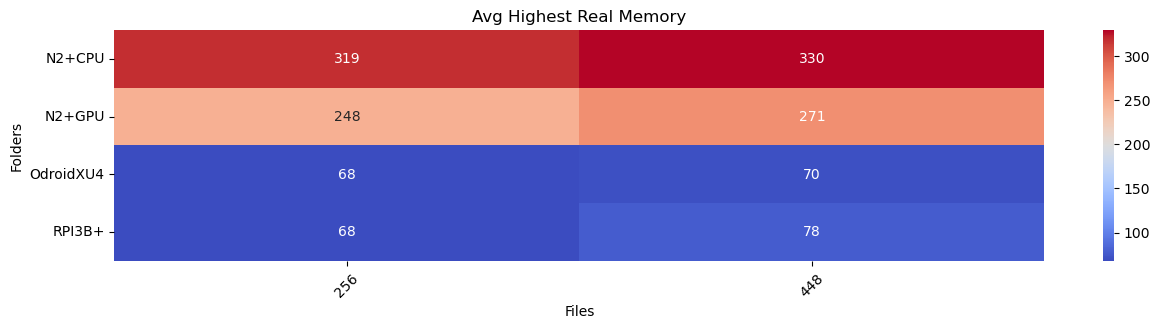

In [25]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def read_files_in_folder(folder_path):
    all_data = []
    filenames = []
    for file in os.listdir(folder_path):
        if file.endswith('.txt'):
            filepath = os.path.join(folder_path, file)
            df = pd.read_csv(filepath, skiprows=1, delimiter=r'\s+', names=['Elapsed time', 'CPU (%)', 'Real (MB)', 'Virtual (MB)'], error_bad_lines=False)
            all_data.append(df)
            filenames.append(file)
    return all_data, filenames

def get_median_real_memory(dataframes):
    folder_values = []
    for df in dataframes:
        median_value = df['Real (MB)'].median()
        folder_values.append(median_value)
    return folder_values

def get_avg_highest_real_memory(dataframes, top_n=10):
    folder_values = []
    for df in dataframes:
        highest_values = df['Real (MB)'].nlargest(top_n).tolist()
        folder_values.append(np.mean(highest_values))
    return folder_values

folders = ['memory/tpu/gpu/processrecordings/output_directory', 'memory/tpu/gpufp16/processrecordings/output_directory','memory/tpu/tpustd/processrecordings/output_directory','memory/tpu/picpu/processrecordings/output_directory']
all_avg_highest_memory = []
filenames_list = []

max_files = 0
for folder in folders:
    data, filenames = read_files_in_folder(folder)
    avg = get_avg_highest_real_memory(data)
    max_files = max(max_files, len(avg))
    all_avg_highest_memory.append(avg)
    filenames_list.append(filenames)

# Fill the missing values with NaN
for i in range(len(all_avg_highest_memory)):
    if len(all_avg_highest_memory[i]) < max_files:
        all_avg_highest_memory[i].extend([np.nan] * (max_files - len(all_avg_highest_memory[i])))

heatmap_data = np.array(all_avg_highest_memory)

# Set xticklabels to filenames
unique_filenames = []
for filenames in filenames_list:
    for filename in filenames:
        if filename not in unique_filenames:
            unique_filenames.append(filename)

# Convert the heatmap_data array to a DataFrame
heatmap_df = pd.DataFrame(heatmap_data)



# Swap columns and their corresponding labels
index1 = 10
index2 = 12
index3 = 11
index4 = 13

# Swap columns in the heatmap_df DataFrame]
"""
heatmap_df[[unique_filenames[index1], unique_filenames[index2]]] = heatmap_df[[unique_filenames[index2], unique_filenames[index1]]]
heatmap_df[[unique_filenames[index3], unique_filenames[index4]]] = heatmap_df[[unique_filenames[index4], unique_filenames[index3]]]

# Swap the corresponding x-labels in the unique_filenames list
unique_filenames[index1], unique_filenames[index2] = unique_filenames[index2], unique_filenames[index1]
unique_filenames[index3], unique_filenames[index4] = unique_filenames[index4], unique_filenames[index3]
"""
plt.figure(figsize=(15, 3))
custom_y_labels = ['N2+CPU','N2+GPU', 'OdroidXU4', 'RPI3B+']
heatmap = sns.heatmap(heatmap_df, annot=True, cmap='coolwarm', fmt='.0f', yticklabels=custom_y_labels)

plt.xlabel('Files')
plt.ylabel('Folders')
plt.title('Avg Highest Real Memory')

# Set the number of xticks and the labels
box_width = 1


custom_x_labels = ['256', '448']

heatmap.set_xticks(np.arange(heatmap_data.shape[1]) + box_width / 2)
heatmap.set_xticklabels(custom_x_labels, rotation=45)

folder_names = ['N2+ CPU','N2+ Mainly GPU', 'Odroidxu4', 'PI3B+']
heatmap_df.index = folder_names


heatmap_df.columns = custom_x_labels
heatmap_df.to_csv('Peak_memory_smallimg.csv')


In [8]:
%pwd

'c:\\Users\\jspre\\year5project\\HCI'

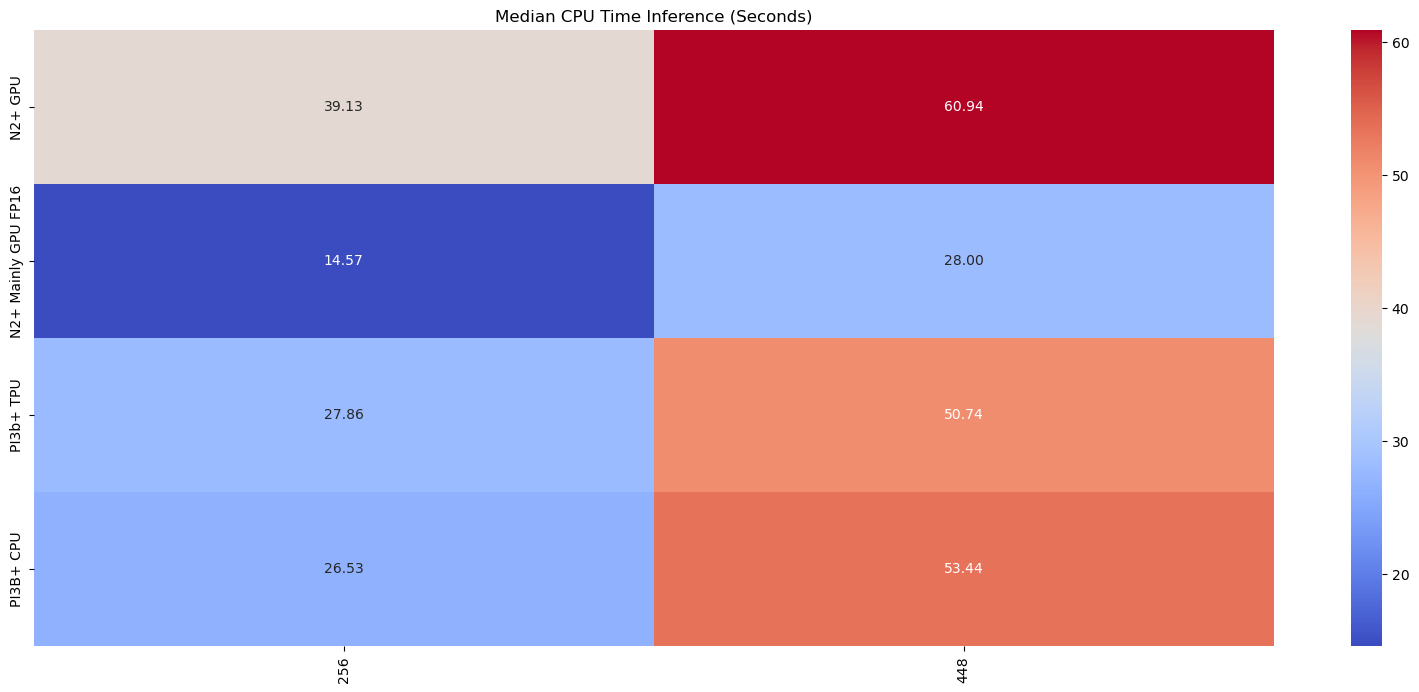

In [22]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def read_new_files_in_folder(folder_path):
    all_data = []
    filenames = []
    for file in os.listdir(folder_path):
        if file.endswith('.txt'):
            filepath = os.path.join(folder_path, file)
            with open(filepath, 'r') as f:
                lines = f.readlines()
                data = []
                for line in lines:
                    values = line.strip().split(' ')
                    if len(values) == 3:
                        try:
                            data.append([values[0], float(values[1]), float(values[2])])
                        except ValueError:
                            continue
                all_data.append(pd.DataFrame(data, columns=['Type', 'CPUTime', 'WallClockTime']))
                filenames.append(file)
    return all_data, filenames

def get_avg_highest_new_data(dataframes, data_type='inference', time_type='CPUTime', top_n=10):
    folder_values = []
    for df in dataframes:
        filtered_df = df[df['Type'] == data_type]
        highest_values = filtered_df[time_type].nlargest(top_n).tolist()
        folder_values.append(np.mean(highest_values))
    return folder_values

def get_avg_new_data(dataframes, data_type='inference', time_type='CPUTime'):
    folder_values = []
    for df in dataframes:
        filtered_df = df[df['Type'] == data_type]
        avg_value = filtered_df[time_type].mean()
        folder_values.append(avg_value)
    return folder_values

def get_median_new_data(dataframes, data_type='inference', time_type='CPUTime'):
    folder_values = []
    for df in dataframes:
        filtered_df = df[df['Type'] == data_type]
        median_value = filtered_df[time_type].median()
        folder_values.append(median_value)
    return folder_values


folders = ['time/tpu/gpucomparison/alltime','time/tpu/gpucomaprisonfp16/alltime', 'time/tpu/tpustd/alltime', 'time/tpu/cpucomparison/alltime']

all_avg_highest_memory = []
filenames_list = []

max_files = 0

for folder in folders:
    data, filenames = read_new_files_in_folder(folder)
    avg = get_avg_new_data(data, data_type= 'total', time_type='WallClockTime')  # Changed the function and time_type parameter
    max_files = max(max_files, len(avg))
    all_avg_highest_memory.append(avg)
    filenames_list.append(filenames)


for i in range(len(all_avg_highest_memory)):
    if len(all_avg_highest_memory[i]) < max_files:
        all_avg_highest_memory[i].extend([np.nan] * (max_files - len(all_avg_highest_memory[i])))

heatmap_data = np.array(all_avg_highest_memory)

unique_filenames = []
for filenames in filenames_list:
    for filename in filenames:
        if filename not in unique_filenames:
            unique_filenames.append(filename)

heatmap_df = pd.DataFrame(heatmap_data)
"""
index1 = 10
index2 = 12
index3 = 11
index4 = 13

heatmap_df[[unique_filenames[index1], unique_filenames[index2]]] = heatmap_df[[unique_filenames[index2], unique_filenames[index1]]]
heatmap_df[[unique_filenames[index3], unique_filenames[index4]]] = heatmap_df[[unique_filenames[index4], unique_filenames[index3]]]

# Swap the corresponding x-labels in the unique_filenames list
unique_filenames[index1], unique_filenames[index2] = unique_filenames[index2], unique_filenames[index1]
unique_filenames[index3], unique_filenames[index4] = unique_filenames[index4], unique_filenames[index3]
"""
custom_y_labels = ['N2+ GPU', 'N2+ Mainly GPU FP16', 'PI3b+ TPU', 'PI3B+ CPU']
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(heatmap_df, annot=True, cmap='coolwarm', fmt='.2f', yticklabels=custom_y_labels)


plt.title('Median CPU Time Inference (Seconds)')

box_width = 1

custom_x_labels = unique_filenames  # Use filenames as x labels

custom_x_labels = ['256', '448']

heatmap.set_xticks(np.arange(heatmap_data.shape[1]) + box_width / 2)
heatmap.set_xticklabels(custom_x_labels, rotation=90)
plt.savefig('median_CPUTIME_heatmap.jpeg', format='jpeg', dpi=1000)
plt.show()

folder_names = ['N2+ GPU', 'N2+ Mainly GPU FP16', 'PI3b+ TPU', 'PI3B+ CPU']

extension = "_walltime"

# Add the extension word to each string in the list
custom_x_labels = [string + extension for string in custom_x_labels]


heatmap_df.columns = custom_x_labels
heatmap_df.to_csv('TotalTime_smallimg.csv')


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
custom_y_labels = ['ALL-8n-FP16', 'ALL-8n-INT8', 'ALL-8s-FP16', 'ALL-8s-INT8', 'SHIP-8n-FP16', 'SHIP-8n-INT8', 'SHIP-8s-FP16', 'SHIP-8s-INT8','ALL-5n-FP16', 'ALL-5n-INT8', 'ALL-5s-FP16', 'ALL-5s-INT8', 'SHIP-5n-FP16', 'SHIP-5n-INT8', 'SHIP-5s-FP16', 'SHIP-5s-INT8','ALL-5n-TPU','SHIP-5n-TPU','ALL-5s-TPU','SHIP-5s-TPU']
folder_names = ['N2+ CPU ','N2+ GPU', 'XU4', 'PI3B+']

# Read the CSV file
#data = pd.read_csv("csvfolders/avg_power_full.csv", header=None)
data = pd.read_csv("peak_memory_heatmap_data.csv", header=None)
# Create a heatmap using Seaborn
sns.set()
plt.figure(figsize=(4, 4))

unit = 'm/s'

ax = sns.heatmap(data, annot=True, fmt=".1f", cmap="coolwarm", yticklabels=custom_y_labels, cbar=True, cbar_kws={'label': ' '})
ax.set_xticklabels(folder_names, rotation=0)

# Define the unit
unit = 'MB'

# Get the color bar object from the heatmap
cbar = ax.collections[0].colorbar

# Set the label for the color bar
cbar.ax.set_title(f'Memory: {unit}', loc='left', pad=10)

ax.tick_params(axis='both', labelsize=10)  # Set the font size for both x and y tick labels
ax.tick_params(axis='x', labelsize=10)
plt.title("Top 10 Avg Memory Consumption")
plt.xlabel("Test Cases")
plt.ylabel("Models")
plt.savefig('csvfolders/PeakMemorytop10Full.pdf', bbox_inches='tight', format='pdf')

plt.show()
